In [23]:
import pandas as pd
import numpy as np
from collections import defaultdict

all_targets = pd.read_csv("static/tess-ultra-fast-rotators-brighter-mag14-clean.csv").Name.values
radii = []
true_positives = defaultdict(list)
methods = {
    "bls_bspline": "Bspline + BLS",
    "bls_wotan3D": "bi-weight + BLS",
    "gp": "GP + BLS",
    "bls_harmonics": "harmonics + BLS",
    "bens": "iterative + BLS",
    "nuance": "nuance",
}

for target in all_targets:
    df = pd.read_csv(f"data/{target}/recovered/nuance/results.csv")
    radii.append(df.radius.values)
    for method in methods.keys():
        tp = np.load(f"data/{target}/recovered/{method}.npy")[2] 
        true_positives[method].append(tp)

radii = np.hstack(radii)
for method in methods.keys():
    true_positives[method] = np.hstack(true_positives[method])

print(np.min(radii), np.max(radii), np.median(radii))

0.4579168481492983 12.293638616971965 2.3972664794149274


In [218]:
radius_tp = defaultdict(list)

step = 1
r = np.hstack([np.arange(0.5, 3, 0.1), np.arange(3, 5, 0.3), np.arange(5, 12, 1)])
for i in range(len(r) - 1):
    idxs = np.logical_and(radii <= r[i+1], radii > r[i])
    for method in methods.keys():
        radius_tp[method].append(true_positives[method][idxs].mean())

best_radius_tp = []
for method in methods.keys():
    radius_tp[method] = np.array(radius_tp[method])

In [219]:
best_radius_tp = np.max([radius_tp[key] for key in methods.keys() if key != "nuance"], 0)
nuance_radius_tp = np.array(radius_tp["nuance"])

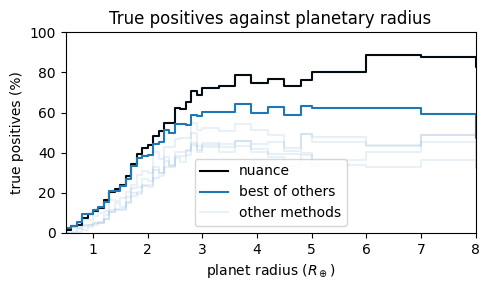

In [223]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 3))

def hist(x, y, c="C0", label=None):
    # plt.fill_between(x, np.zeros_like(x), y, alpha=0.2, color=c, step="pre")
    plt.step(x, y, c=c, label=label)


hist(r[0:-1], nuance_radius_tp*100, c="k", label="nuance")
hist(r[0:-1], best_radius_tp*100, c="C0", label="best of others")

for i, method in enumerate(methods.keys()):
    plt.step(r[0:-1], radius_tp[method]*100, color="C0", alpha=0.1, label="other methods" if i == 0 else None)

plt.xlabel("planet radius ($R_\oplus$)")
plt.ylabel("true positives (%)")
plt.legend()
plt.ylim(0,100)
plt.xlim(0.5, 8)
plt.title("True positives against planetary radius")
plt.tight_layout()
plt.savefig("figures/tpfp_radius.pdf")

In [68]:
nuance_radius_tp/best_radius_tp * 100 - 100

array([ -3.32541568,   7.42618551,  15.69602273,  21.66080844,
        22.37600923,  23.58722359,  34.44444444,  52.56410256,
        44.        , 109.09090909,   0.        ,  33.33333333])

In [31]:
radius_tp['bls_bspline']

[29.0,
 1053.0,
 2921.0,
 2109.0,
 859.0,
 331.0,
 139.0,
 63.0,
 32.0,
 13.0,
 3.0,
 4.0,
 3.0]

In [32]:
radius_tp['nuance']

[46.0,
 2067.0,
 5011.0,
 3659.0,
 1634.0,
 645.0,
 328.0,
 170.0,
 77.0,
 33.0,
 15.0,
 5.0,
 8.0]

In [4]:
radii = np.load("/Users/lgarcia/papers/nuance/workflows/tess_injection_recovery/data/11182/recovered/nuance.npy")[2]
true_posotives = np.load("/Users/lgarcia/papers/nuance/workflows/tess_injection_recovery/data/11182/recovered/nuance.npy")[2]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1.,
       1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.])

In [ ]:
/Users/lgarcia/papers/nuance/workflows/tess_injection_recovery/data/11182/recovered/nuance.npy